In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
tf.test.is_gpu_available()

False

In [3]:
data = keras.datasets.imdb
max_word = 10000

In [4]:
(x_train, y_train), (x_test, y_test) = data.load_data(num_words = max_word)

In [5]:
x_train.shape, y_train.shape

((25000,), (25000,))

In [6]:
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

文本序列训练成密集向量

In [7]:
[len(x) for x in x_train]

[218,
 189,
 141,
 550,
 147,
 43,
 123,
 562,
 233,
 130,
 450,
 99,
 117,
 238,
 109,
 129,
 163,
 752,
 212,
 177,
 129,
 140,
 256,
 888,
 93,
 142,
 220,
 193,
 171,
 221,
 174,
 647,
 233,
 162,
 597,
 234,
 51,
 336,
 139,
 231,
 704,
 142,
 861,
 132,
 122,
 570,
 55,
 214,
 103,
 186,
 113,
 169,
 469,
 138,
 302,
 766,
 351,
 146,
 59,
 206,
 107,
 152,
 186,
 431,
 147,
 684,
 383,
 324,
 252,
 263,
 787,
 211,
 314,
 118,
 390,
 132,
 710,
 306,
 167,
 115,
 95,
 158,
 156,
 82,
 502,
 314,
 190,
 174,
 60,
 145,
 214,
 659,
 408,
 515,
 461,
 202,
 238,
 170,
 107,
 171,
 158,
 145,
 790,
 258,
 287,
 67,
 123,
 975,
 775,
 236,
 195,
 274,
 214,
 91,
 1038,
 815,
 183,
 206,
 50,
 118,
 147,
 141,
 60,
 56,
 439,
 439,
 213,
 144,
 533,
 303,
 203,
 563,
 129,
 153,
 55,
 92,
 174,
 187,
 183,
 165,
 78,
 198,
 156,
 223,
 127,
 61,
 362,
 84,
 57,
 176,
 159,
 57,
 159,
 165,
 213,
 194,
 149,
 130,
 203,
 19,
 98,
 466,
 525,
 130,
 322,
 153,
 408,
 215,
 472,
 143,
 1

In [8]:
x_train = keras.preprocessing.sequence.pad_sequences(x_train, 300)                 #文本序列填充和截取
x_test = keras.preprocessing.sequence.pad_sequences(x_test, 300)                 #文本序列填充和截取
[len(x) for x in x_train]

[300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300

In [9]:
y_train

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [10]:
test = 'I am a student'

In [11]:
dict((word, test.split().index(word)) for word in test.split())   #将英文单词对应到编号

{'I': 0, 'am': 1, 'a': 2, 'student': 3}

In [12]:
test.split()

['I', 'am', 'a', 'student']

In [13]:
['I', 'am', 'a', 'student'].index('am')

1

In [14]:
model = keras.models.Sequential()

In [15]:
model.add(layers.Embedding(10000, 50, input_length = 300))                   #映射成密集向量

25000, 300, 50 数据格式变为 25000, 300x50 的二维数据

In [16]:
model.add(layers.GlobalAveragePooling1D())    #全局池化，将300长度取均值降维，flatten则是将300x50展开

In [17]:
model.add(layers.Dense(64, activation='relu', kernel_regularizer = 'l2'))  #添加l1 l2正则化

In [18]:
model.add(layers.Dropout(0.5))

In [19]:
model.add(layers.Dense(1, activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 50)           500000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                3264      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 503,329
Trainable params: 503,329
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.001),
              loss = 'binary_crossentropy',
              metrics = ['acc']
)

In [22]:
history = model.fit(x_train, y_train, epochs=15, batch_size=256, validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 7s 276us/sample - loss: 0.9978 - acc: 0.5855 - val_loss: 0.8216 - val_acc: 0.6873
Epoch 2/15
25000/25000 [==============================] - 5s 213us/sample - loss: 0.7444 - acc: 0.6969 - val_loss: 0.6861 - val_acc: 0.7639
Epoch 3/15
25000/25000 [==============================] - 5s 216us/sample - loss: 0.6263 - acc: 0.7778 - val_loss: 0.5725 - val_acc: 0.8182
Epoch 4/15
25000/25000 [==============================] - 5s 216us/sample - loss: 0.5217 - acc: 0.8310 - val_loss: 0.4925 - val_acc: 0.8502
Epoch 5/15
25000/25000 [==============================] - 5s 216us/sample - loss: 0.4591 - acc: 0.8564 - val_loss: 0.4482 - val_acc: 0.8618
Epoch 6/15
25000/25000 [==============================] - 5s 217us/sample - loss: 0.4172 - acc: 0.8711 - val_loss: 0.4199 - val_acc: 0.8679
Epoch 7/15
25000/25000 [==============================] - 5s 211us/sample - loss: 0.3910 - acc: 0.8789 - val_l

In [23]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

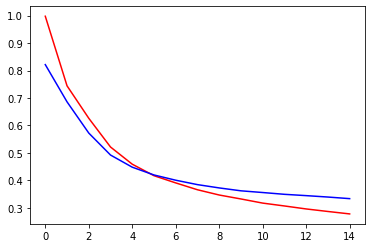

In [25]:
plt.plot(history.epoch, history.history['loss'], 'r')
plt.plot(history.epoch, history.history['val_loss'], 'b')

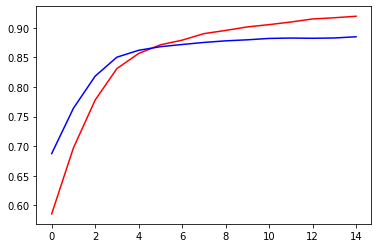

In [26]:
plt.plot(history.epoch, history.history['acc'], 'r')
plt.plot(history.epoch, history.history['val_acc'], 'b')

解决过拟合， 1 dropout层 2 L1 L2正则化